In [2]:
import pandas as pd

df = pd.read_csv('dataset.csv', delimiter=',')

df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
#Traning and prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier   

y = df['Target']
x = df.drop('Target', axis=1)


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

y_predict


array(['Graduate', 'Enrolled', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Enrolled', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Graduate',
       'Graduate

In [25]:
#Model Evaluation
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_predict)

report = classification_report(y_test, y_predict)

print(f'Accuracy: {accuracy:.2f}')
print(report)



Accuracy: 0.77
              precision    recall  f1-score   support

     Dropout       0.79      0.75      0.77       288
    Enrolled       0.45      0.33      0.38       142
    Graduate       0.82      0.91      0.86       455

    accuracy                           0.77       885
   macro avg       0.69      0.67      0.67       885
weighted avg       0.75      0.77      0.76       885



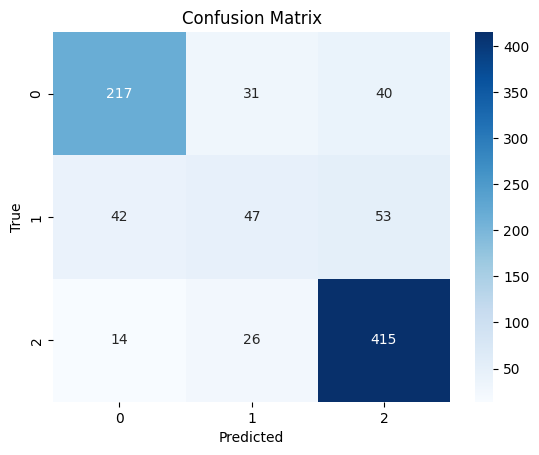

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True');
